# The Sparks Foundation
# #GRIPDEC22  
# TASK-2: Prediction using UnSupervised ML

## Importing libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load Dataset

In [78]:
iris = pd.read_csv("Iris.csv")
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [79]:
iris.shape

(150, 6)

In [80]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [81]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Heat Map

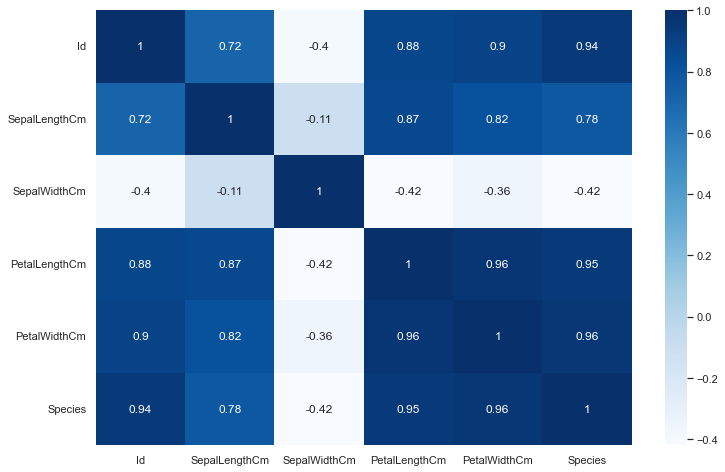

In [115]:
plt.figure(figsize=(12,8))
sns.set()
sns.heatmap(iris.corr(),annot= True, cmap="Blues")
plt.show()

In [82]:
label=LabelEncoder()
iris["Species"]=label.fit_transform(iris["Species"])

In [83]:
species_id = iris["Species"].unique()
print("Specie label: ",species_id)

Specie label:  [0 1 2]


## Visualizing data

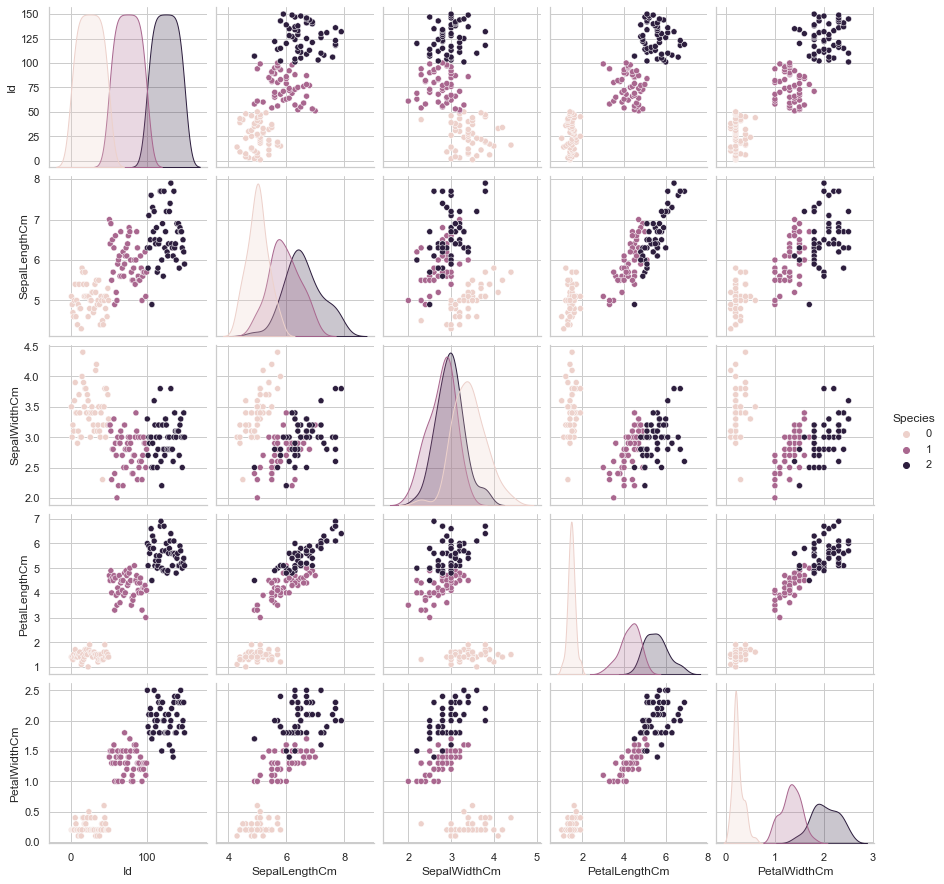

In [84]:
sns.pairplot(data=iris,hue='Species')

## Sepal Width vs Sepal Length

Text(0.5, 1.0, 'Scatter Plot: Sepal Width vs Sepal Length(cm)')

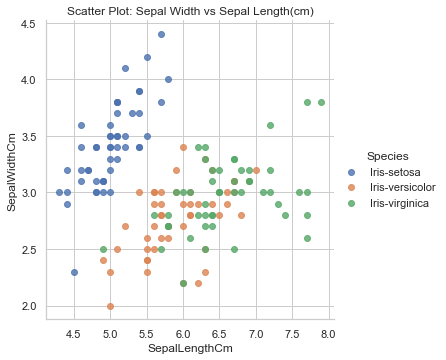

In [57]:
sns.set_style('whitegrid')
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,fit_reg=False,hue='Species')
plt.title("Scatter Plot: Sepal Width vs Sepal Length(cm)")


## Petal Width vs Petal Length

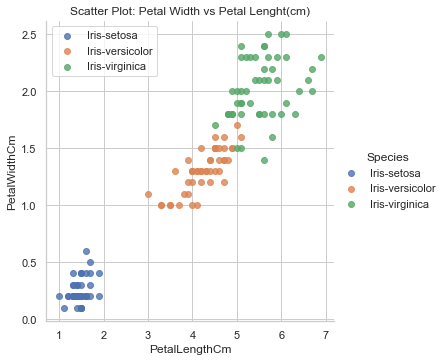

In [44]:
sns.set_style('whitegrid')
sns.lmplot(x='PetalLengthCm',y='PetalWidthCm', data=iris, fit_reg=False, hue='Species')
plt.title("Scatter Plot: Petal Width vs Petal Lenght(cm)")
plt.legend()

## Kmeans - clustering

In [99]:
x = iris.iloc[:,:-1].values

In [100]:
kmeans = KMeans(3)

In [101]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [102]:
kmeans.inertia_

31365.589670588237

## The Elbow Method

In [103]:
wcss = [] #Withing Clusters Sum of Squares 

for i in range(1,15):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'within-cluster sum of squares')

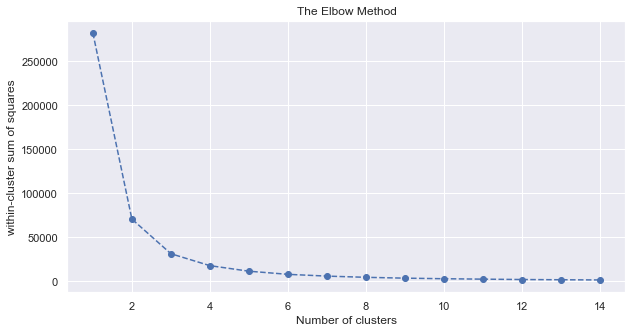

In [111]:
sns.set_style('darkgrid')
number_clusters = range(1,15)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss,'bo--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of squares')

In [105]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(x)

df = iris.copy()
df['cluster']= clusters
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


## Visualizing clusters

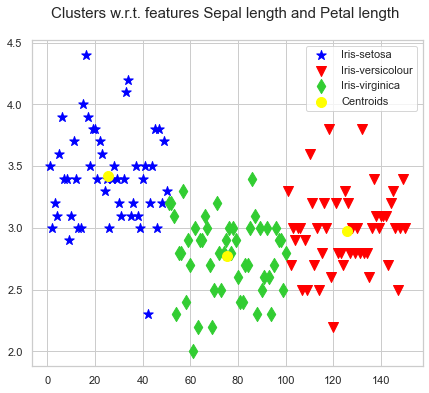

In [109]:

sns.set_style('whitegrid')
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t. features Sepal length and Petal length \n',size=15)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 2], marker='*',s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 2], marker='v', s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 2], marker='d', s = 100, c = 'limegreen', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], marker='o',s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

### -Mala Subramanian-